# Trabajo ML

## Importamos las librerías necesarias

#### Librerías básicas para el tratamiento con datos y posteriores gráficos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Importamos funciones que iremos necesitando a lo largo del trabajo

In [2]:
from sklearn.utils import resample

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.preprocessing import LabelEncoder

# Librería necesaria para poder separar en conjuntos de training y testing
from sklearn.model_selection import train_test_split

#### Importamos también una librería que nos ayudará a codificar las variables categóricas

In [3]:
import category_encoders as ce

#### Importamos por otro lado la función tree necesaria para el posterior tree decision model

In [4]:
from sklearn import tree

#### Importamos las funciones necesarias para después poder hallar las medidas necesarias

In [5]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_score, accuracy_score, f1_score

In [6]:
from sklearn.feature_selection import SelectFromModel, RFE

#### Mostramos a continuación la creación de dos funciones propias que se han utilizado para encapsular código.

In [7]:
# Creamos la función evaluate_model que nos servirá más adelante para poder ver los valores de 
# diferentes medidas obtenidas por el modelo
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))    

## Lectura del fichero csv

In [8]:
df_selected = pd.read_csv("../data/df_selected.csv")

In [9]:
# Echamos un vistazo rápido a la pinta que tiene el data frame
df_selected

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
0,11575.0,11575.0,11575.0,36,7.35,359.26,A,A4,6,OWN,...,0,8.0,2.0,1.0,0.0,0,Jun,2017,1994,23
1,7200.0,7200.0,7200.0,36,24.85,285.70,E,E3,2,RENT,...,0,2.0,0.0,0.0,0.0,0,Jun,2017,2000,17
2,7500.0,7500.0,7500.0,36,7.35,232.79,A,A4,7,MORTGAGE,...,0,13.0,4.0,0.0,0.0,0,Jun,2017,2013,4
3,10000.0,10000.0,10000.0,60,16.02,243.29,C,C5,7,RENT,...,0,7.0,0.0,2.0,0.0,0,Jun,2017,2006,11
4,14000.0,14000.0,14000.0,36,16.02,492.34,C,C5,7,MORTGAGE,...,0,5.0,1.0,0.0,0.0,0,Jun,2017,2008,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442330,11575.0,11575.0,11575.0,36,15.59,404.61,D,D1,10,RENT,...,0,1.0,0.0,0.0,0.0,0,Jan,2015,1999,16
442331,12000.0,12000.0,12000.0,36,11.99,398.52,B,B5,1,MORTGAGE,...,0,11.0,1.0,0.0,0.0,0,Jan,2015,1995,20
442332,13000.0,13000.0,13000.0,60,15.99,316.07,D,D2,5,RENT,...,0,7.0,0.0,1.0,0.0,0,Jan,2015,2003,12
442333,12000.0,12000.0,12000.0,60,19.99,317.86,E,E3,1,RENT,...,0,6.0,0.0,0.0,0.0,0,Jan,2015,2003,12


#### Vamos ahora a mirar qué pinta tienen las variables del dataset. Para ello utilizaremos la función describe(). Añadiremos también un  include = "all" para obligar a que me incluya todas las columnas del dataset en el describe().

In [10]:
df_selected.describe(include = "all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
count,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335,442335.000000,442335,...,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335.000000,442335.000000,442335.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C,C1,NaN,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,Oct,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,124885,26548,NaN,220364,...,NaN,NaN,NaN,NaN,NaN,NaN,56111,NaN,NaN,NaN
mean,14566.416856,14566.416856,14561.066882,42.140378,13.255884,439.935320,NaN,NaN,5.767755,NaN,...,0.002258,4.795908,1.776111,0.147868,0.056475,0.000020,NaN,2014.599414,1998.159006,16.440408
std,8500.018979,8500.018979,8496.756229,10.472109,4.471144,252.505972,NaN,NaN,3.722447,NaN,...,0.047470,3.143748,2.089641,0.397284,0.419215,0.004511,NaN,0.670304,7.464446,7.429709
min,1000.000000,1000.000000,900.000000,36.000000,5.320000,14.010000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1944.000000,3.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,256.900000,NaN,NaN,2.000000,NaN,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1994.000000,11.000000
50%,12500.000000,12500.000000,12500.000000,36.000000,12.990000,378.760000,NaN,NaN,6.000000,NaN,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2000.000000,15.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,15.990000,579.720000,NaN,NaN,10.000000,NaN,...,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2003.000000,20.000000


In [11]:
# filtro el df_selected en función de si la variable loan_status toma el valor 0 o 1
df_major = df_selected[df_selected.loan_status == 0]
df_minor = df_selected[df_selected.loan_status == 1]

In [12]:
df_minor_upsmapled = resample(df_minor, replace = True, n_samples = 358436, random_state = 12345)
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
400464,28250.0,28250.0,28250.0,36,15.61,987.76,D,D1,2,MORTGAGE,...,0,9.0,3.0,0.0,0.0,0,Apr,2015,1994,21
366148,12175.0,12175.0,12175.0,60,25.80,363.09,G,G1,1,RENT,...,0,8.0,1.0,0.0,0.0,0,May,2015,1997,18
22099,2000.0,2000.0,2000.0,36,18.54,72.85,E,E1,2,MORTGAGE,...,0,20.0,2.0,1.0,0.0,0,Dec,2014,1988,26
396340,5000.0,5000.0,5000.0,36,14.65,172.48,C,C5,6,OWN,...,0,3.0,0.0,0.0,0.0,0,Mar,2015,1981,34
32729,12400.0,12400.0,12400.0,60,8.67,255.43,B,B1,1,RENT,...,0,1.0,0.0,0.0,0.0,0,Nov,2014,1983,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157970,21075.0,21075.0,20975.0,60,19.47,552.17,D,D5,1,OWN,...,0,4.0,6.0,0.0,0.0,0,May,2014,1994,20
243800,10000.0,10000.0,10000.0,36,12.05,332.39,C,C1,1,OWN,...,0,3.0,0.0,0.0,0.0,0,Dec,2015,2005,10
21700,5825.0,5825.0,5825.0,36,18.54,212.17,E,E1,10,OWN,...,0,4.0,0.0,0.0,2.0,0,Dec,2014,2003,11
236605,35000.0,35000.0,34750.0,36,14.48,1204.40,C,C5,1,MORTGAGE,...,0,5.0,0.0,0.0,1.0,0,Dec,2015,2000,15


In [13]:
df_minor_upsmapled = pd.concat([df_minor_upsmapled, df_major])
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
400464,28250.0,28250.0,28250.0,36,15.61,987.76,D,D1,2,MORTGAGE,...,0,9.0,3.0,0.0,0.0,0,Apr,2015,1994,21
366148,12175.0,12175.0,12175.0,60,25.80,363.09,G,G1,1,RENT,...,0,8.0,1.0,0.0,0.0,0,May,2015,1997,18
22099,2000.0,2000.0,2000.0,36,18.54,72.85,E,E1,2,MORTGAGE,...,0,20.0,2.0,1.0,0.0,0,Dec,2014,1988,26
396340,5000.0,5000.0,5000.0,36,14.65,172.48,C,C5,6,OWN,...,0,3.0,0.0,0.0,0.0,0,Mar,2015,1981,34
32729,12400.0,12400.0,12400.0,60,8.67,255.43,B,B1,1,RENT,...,0,1.0,0.0,0.0,0.0,0,Nov,2014,1983,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442326,13150.0,13150.0,13150.0,60,14.99,312.77,C,C5,8,MORTGAGE,...,0,0.0,3.0,0.0,0.0,0,Jan,2015,1994,21
442327,12000.0,12000.0,12000.0,36,9.49,384.34,B,B2,4,RENT,...,0,3.0,0.0,0.0,0.0,0,Jan,2015,2006,9
442328,4000.0,4000.0,4000.0,36,8.67,126.59,B,B1,10,MORTGAGE,...,0,8.0,1.0,1.0,0.0,0,Jan,2015,2002,13
442330,11575.0,11575.0,11575.0,36,15.59,404.61,D,D1,10,RENT,...,0,1.0,0.0,0.0,0.0,0,Jan,2015,1999,16


In [14]:
df_minor_upsmapled.loan_status.value_counts()

1    358436
0    345335
Name: loan_status, dtype: int64

In [15]:
df_minor_upsmapled.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int64
application_type          int64
acc_open_past_24mths    float64
mort_acc                float64
pub_rec_bankruptcies    float64
tax_liens               float64
disbursement_method       int64
issue_mo

In [16]:
X = df_minor_upsmapled.drop("loan_status", axis = 1)
Y = df_minor_upsmapled.loan_status

In [17]:
Y = LabelEncoder().fit_transform(Y)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

In [19]:
xtrain.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status       int64
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int64
application_type          int64
acc_open_past_24mths    float64
mort_acc                float64
pub_rec_bankruptcies    float64
tax_liens               float64
disbursement_method       int64
issue_month              object
issue_ye

In [20]:
xtrain.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,...,initial_list_status,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_year,earliest_cr_year,credit_history
count,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,5.278280e+05,527828.000000,527828.000000,...,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000,527828.000000
mean,14908.606213,14908.606213,14902.696015,43.586517,14.072943,445.751804,5.697413,7.324279e+04,0.267265,19.167385,...,0.560042,0.001870,5.018891,1.654880,0.151765,0.058009,0.000025,2014.608869,1998.380552,16.228317
std,8493.332604,8493.332604,8489.837090,11.158916,4.565485,249.899654,3.736866,6.983832e+04,0.442532,8.771095,...,0.496382,0.043202,3.227543,2.024245,0.403533,0.403209,0.004963,0.626757,7.442686,7.414240
min,1000.000000,1000.000000,900.000000,36.000000,5.320000,14.010000,0.000000,1.000000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1944.000000,3.000000
25%,8225.000000,8225.000000,8225.000000,36.000000,10.990000,266.060000,2.000000,4.500000e+04,0.000000,12.760000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1995.000000,11.000000
50%,13175.000000,13175.000000,13175.000000,36.000000,13.670000,386.180000,6.000000,6.200000e+04,0.000000,18.740000,...,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,2000.000000,15.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,16.990000,582.080000,10.000000,8.800000e+04,1.000000,25.300000,...,1.000000,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,2015.000000,2003.000000,20.000000
max,40000.000000,40000.000000,40000.000000,60.000000,30.990000,1587.230000,10.000000,8.900060e+06,1.000000,999.000000,...,1.000000,1.000000,53.000000,34.000000,12.000000,85.000000,1.000000,2017.000000,2014.000000,70.000000


#### Veamos qué columnas son de tipo object y cuales de tipo entero y float

In [21]:
num_xtrain = xtrain.select_dtypes(include=['int64', 'float64']).columns
cat_xtrain = xtrain.select_dtypes(include=['object']).columns

#### Dado que tenemos que modificar las columnas de tipo object, haremos uso del mean encoding para convertirlas a numéricas. Este cambio se hace añadiendo columnas nuevas al data frame. 

In [22]:
from category_encoders.target_encoder import TargetEncoder

In [23]:
TE = TargetEncoder(cols=cat_xtrain)
model = TE.fit(xtrain, ytrain)

In [24]:
x_train_t = model.transform(xtrain)
x_train_t

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
405387,13000.0,13000.0,13000.0,60,7.89,262.91,0.207034,0.270693,1,0.462032,...,0,6.0,5.0,0.0,0.0,0,0.500580,2015,2002,13
234295,10000.0,10000.0,10000.0,36,11.99,332.10,0.530756,0.482322,10,0.520542,...,0,3.0,2.0,0.0,0.0,0,0.551467,2015,1997,18
312077,25000.0,25000.0,25000.0,60,9.17,521.03,0.378941,0.342780,5,0.462032,...,0,4.0,8.0,0.0,0.0,0,0.506561,2015,1992,23
292927,35000.0,35000.0,35000.0,60,16.99,869.66,0.640544,0.629797,10,0.560056,...,0,3.0,1.0,0.0,0.0,0,0.517023,2015,1990,25
158822,35000.0,35000.0,35000.0,36,20.49,1309.49,0.720839,0.713766,2,0.462032,...,0,14.0,1.0,0.0,0.0,0,0.500668,2014,1998,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,12000.0,12000.0,11750.0,36,10.91,392.36,0.378941,0.401162,10,0.462032,...,0,2.0,0.0,0.0,0.0,0,0.509411,2017,2003,14
373782,18000.0,18000.0,18000.0,60,9.99,382.36,0.378941,0.375200,1,0.462032,...,0,4.0,6.0,0.0,0.0,0,0.506091,2015,2001,14
412304,12000.0,12000.0,12000.0,60,16.55,295.34,0.640544,0.633948,10,0.560056,...,0,6.0,0.0,0.0,0.0,0,0.500580,2015,2002,13
92961,25000.0,25000.0,25000.0,60,14.99,594.62,0.530756,0.565438,10,0.462032,...,0,2.0,1.0,0.0,0.0,0,0.509864,2014,1985,29


In [25]:
x_test_t = model.transform(xtest)
x_test_t

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
11255,28000.0,28000.0,28000.0,60,30.17,908.83,0.764807,0.762943,10,0.462032,...,0,5.0,1.0,1.0,0.0,0,0.509864,2017,2004,13
147808,10000.0,10000.0,10000.0,36,16.29,353.01,0.640544,0.633948,0,0.462032,...,0,7.0,0.0,1.0,0.0,0,0.500668,2014,2002,12
321285,10000.0,10000.0,10000.0,36,13.33,338.54,0.530756,0.533483,10,0.462032,...,0,1.0,3.0,1.0,0.0,0,0.509864,2015,2002,13
225872,29000.0,29000.0,29000.0,60,19.89,766.55,0.720839,0.735717,1,0.560056,...,0,4.0,1.0,0.0,0.0,0,0.551467,2015,2004,11
58860,35000.0,35000.0,35000.0,60,13.98,814.03,0.530756,0.533483,10,0.520542,...,0,7.0,3.0,0.0,0.0,0,0.507998,2014,1998,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81762,13775.0,13775.0,13775.0,60,22.15,381.63,0.720839,0.736720,1,0.560056,...,0,3.0,0.0,0.0,0.0,0,0.517023,2014,2009,5
122988,5000.0,5000.0,5000.0,36,11.67,165.29,0.378941,0.401162,10,0.560056,...,0,5.0,5.0,1.0,0.0,0,0.506561,2014,1999,15
40005,15000.0,15000.0,15000.0,60,17.14,373.92,0.640544,0.667757,1,0.520542,...,0,4.0,0.0,0.0,0.0,0,0.511814,2014,2006,8
188308,24000.0,24000.0,24000.0,60,22.45,669.01,0.720839,0.736720,10,0.462032,...,0,3.0,1.0,0.0,0.0,0,0.504936,2014,2001,13


### Hago el escalado de variables

In [26]:
scaler = StandardScaler()
model_scaled = scaler.fit(x_train_t)
x_train_scaled = pd.DataFrame(scaler.transform(x_train_t), columns=x_train_t.columns, index=x_train_t.index)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_t), columns=x_test_t.columns, index=x_test_t.index)

### Hago el PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()

pca.fit(x_train_scaled)
X_train_pca = pca.transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

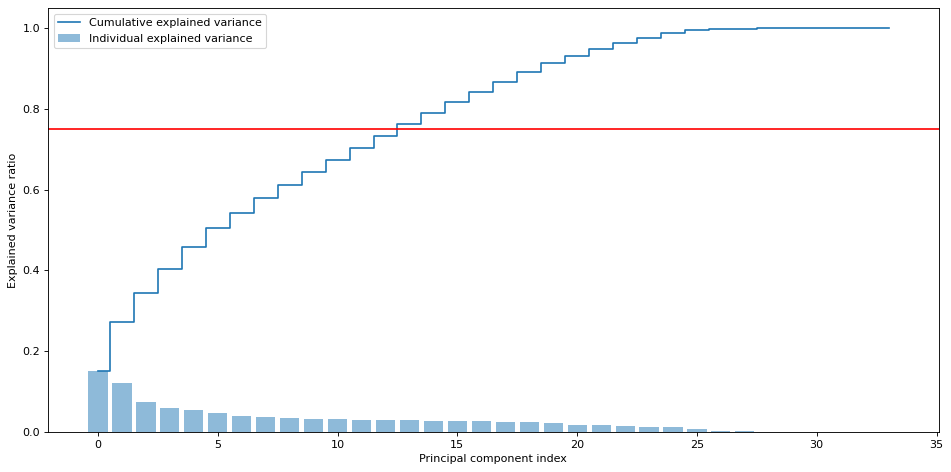

In [29]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.75
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()